In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-10,end.month,end.day)

In [5]:
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
google_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,28.568565,28.668791,28.332712,28.576544,28.506538,31951483
2014-09-16,28.559589,28.995394,28.554604,28.918104,28.847260,29607064
2014-09-17,28.921097,29.295568,28.859516,29.158445,29.087013,33856699
2014-09-18,29.269640,29.396292,29.169914,29.382830,29.310848,28891103
2014-09-19,29.494024,29.742342,29.394299,29.722397,29.649584,74732617
2014-09-22,29.609707,29.616138,29.093124,29.288090,29.216339,33790518
2014-09-23,29.262161,29.262161,28.970463,28.976944,28.905956,29428575
2014-09-24,28.993399,29.400780,28.946527,29.319004,29.247179,34562632
2014-09-25,29.297066,29.318506,28.630396,28.674274,28.604027,38519466


In [7]:
google_data.shape

(2516, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,78.300895,79.139545,77.527401,78.347778,78.161304,3.138956e+07
std,42.426907,42.909174,41.994729,42.446421,42.354540,1.546925e+07
min,24.664783,24.730902,24.311253,24.560070,24.499903,6.936000e+06
25%,41.447001,41.672001,41.314139,41.529376,41.427636,2.176500e+07
50%,61.176001,61.575500,60.495001,60.986750,60.837345,2.752885e+07
75%,114.707499,116.525000,113.654501,114.980000,114.698320,3.628150e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,2.232980e+08


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-09-15 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

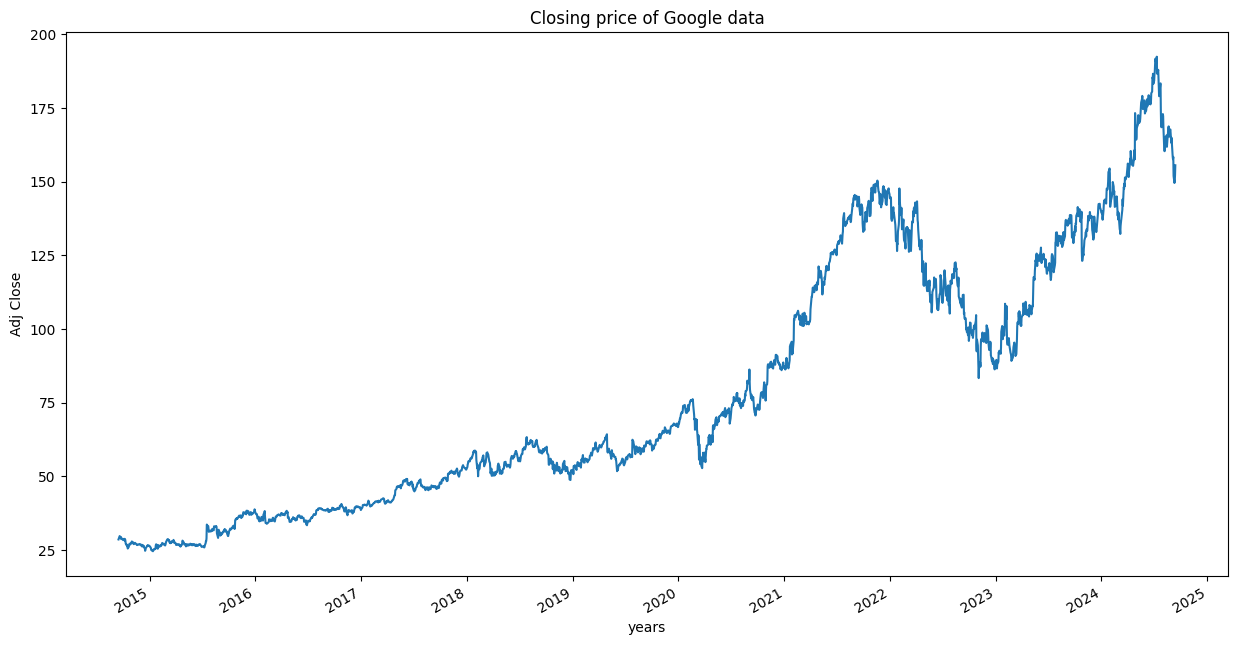

In [44]:
plt.figure(figsize=(15,8))
google_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing price of Google data")

In [18]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [16]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

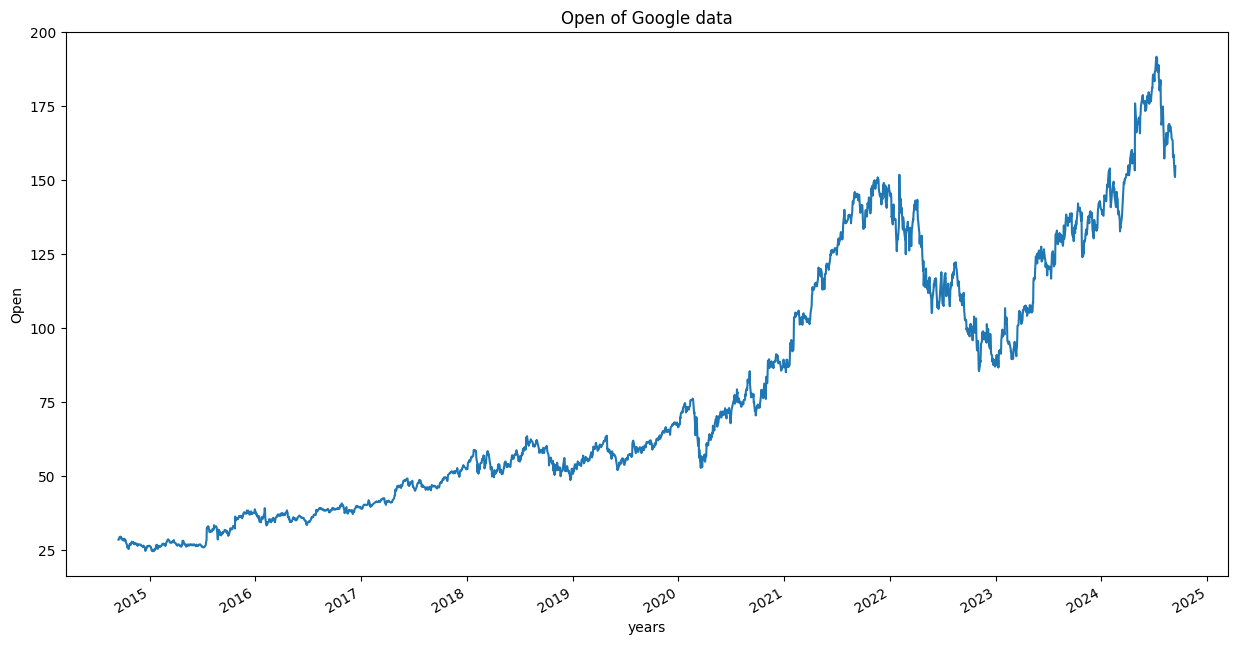

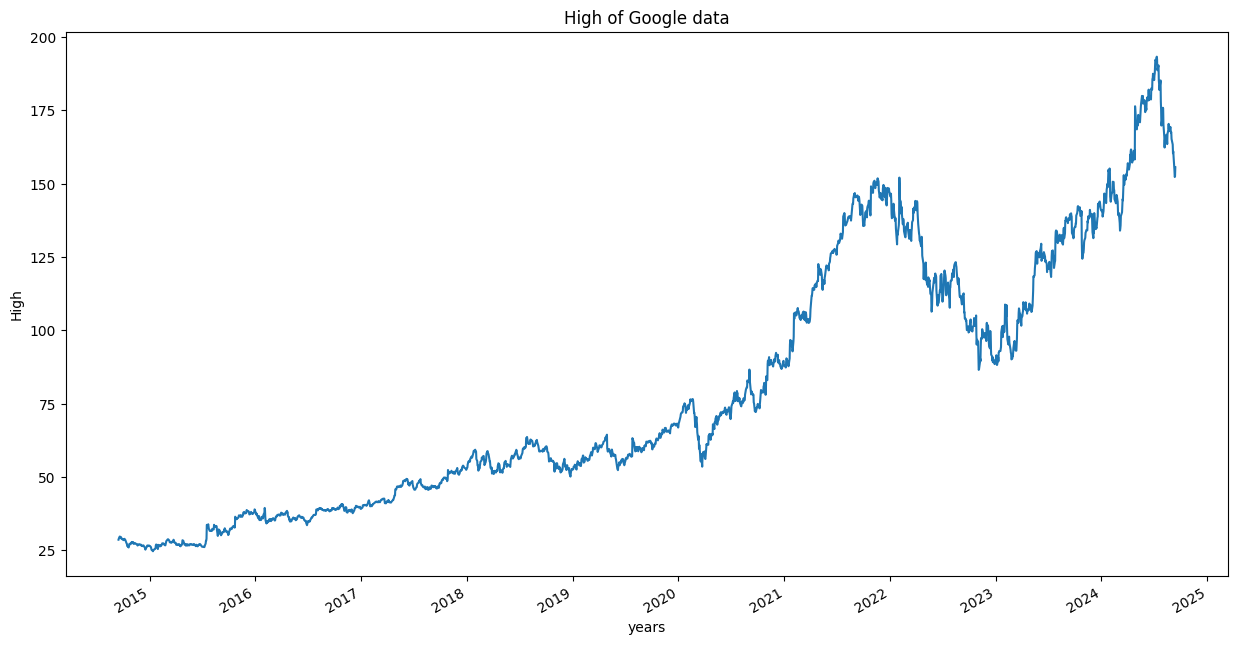

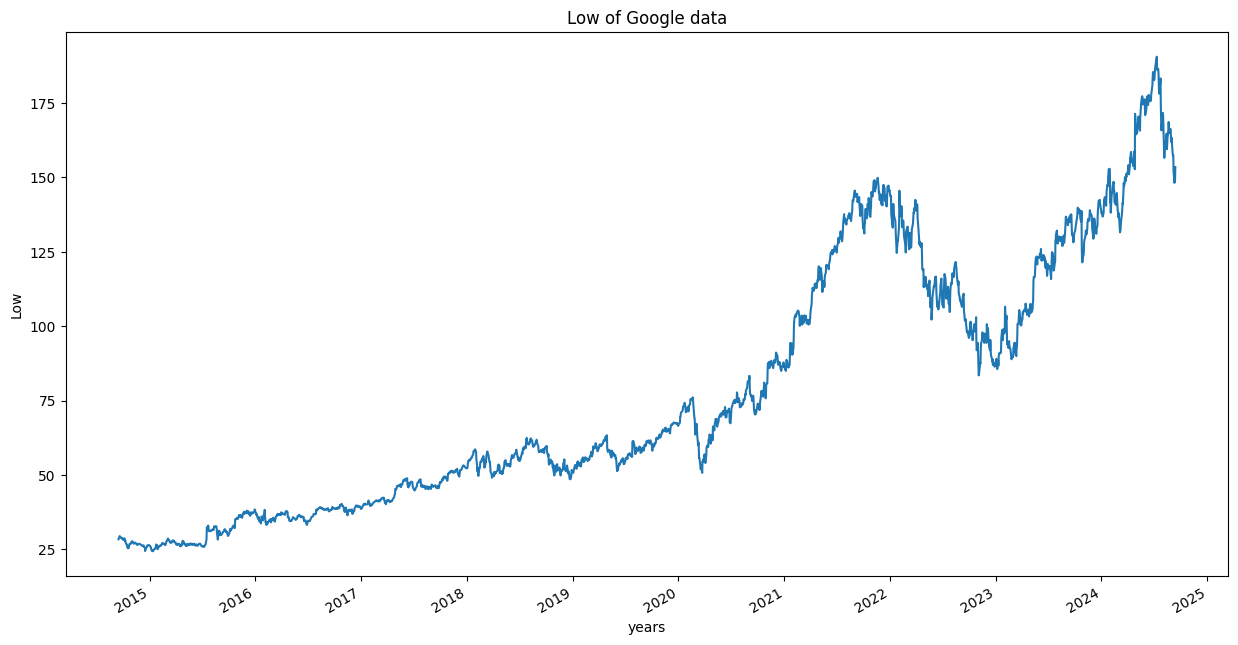

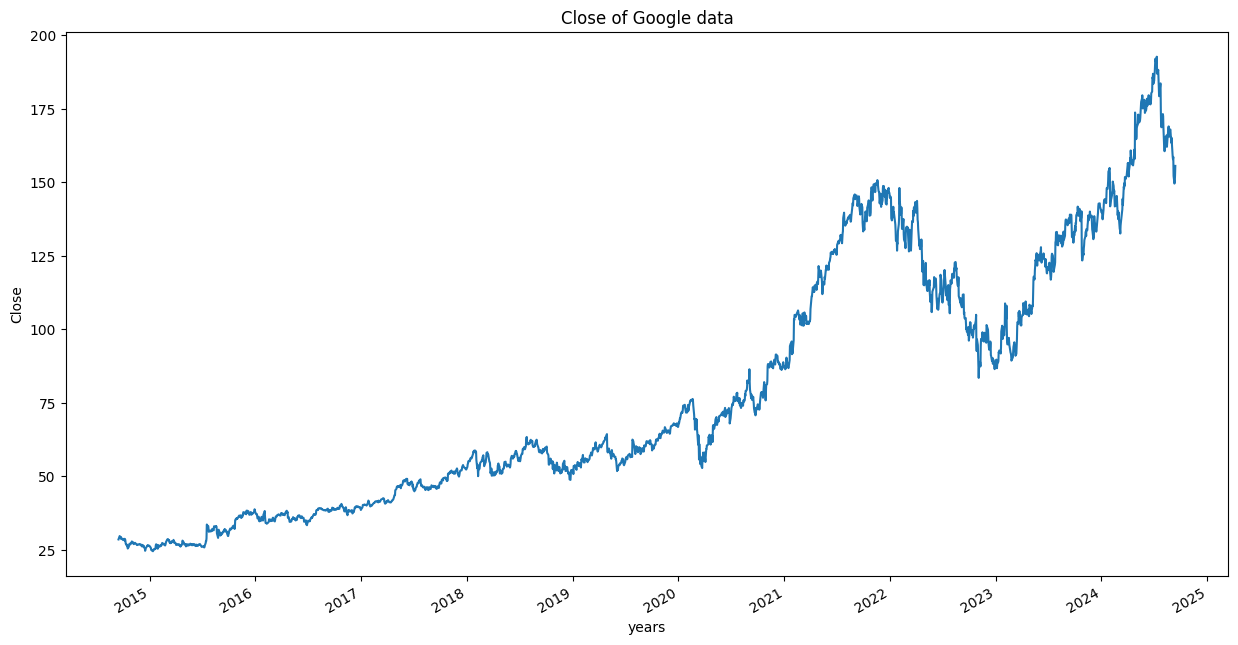

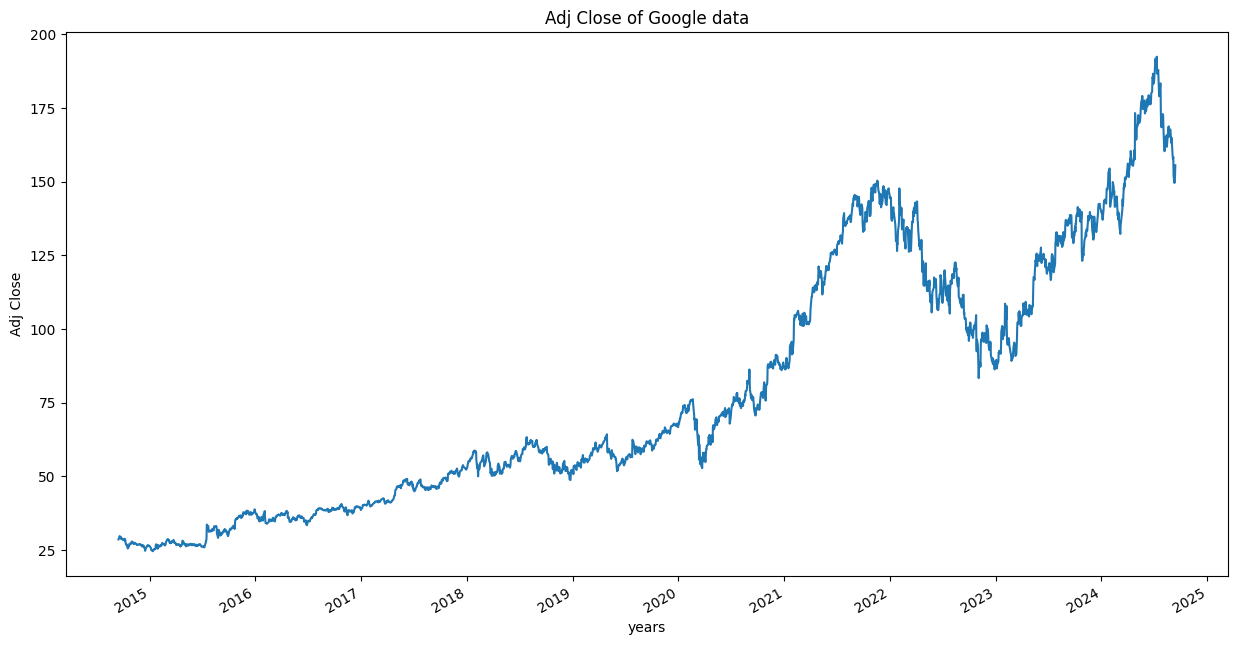

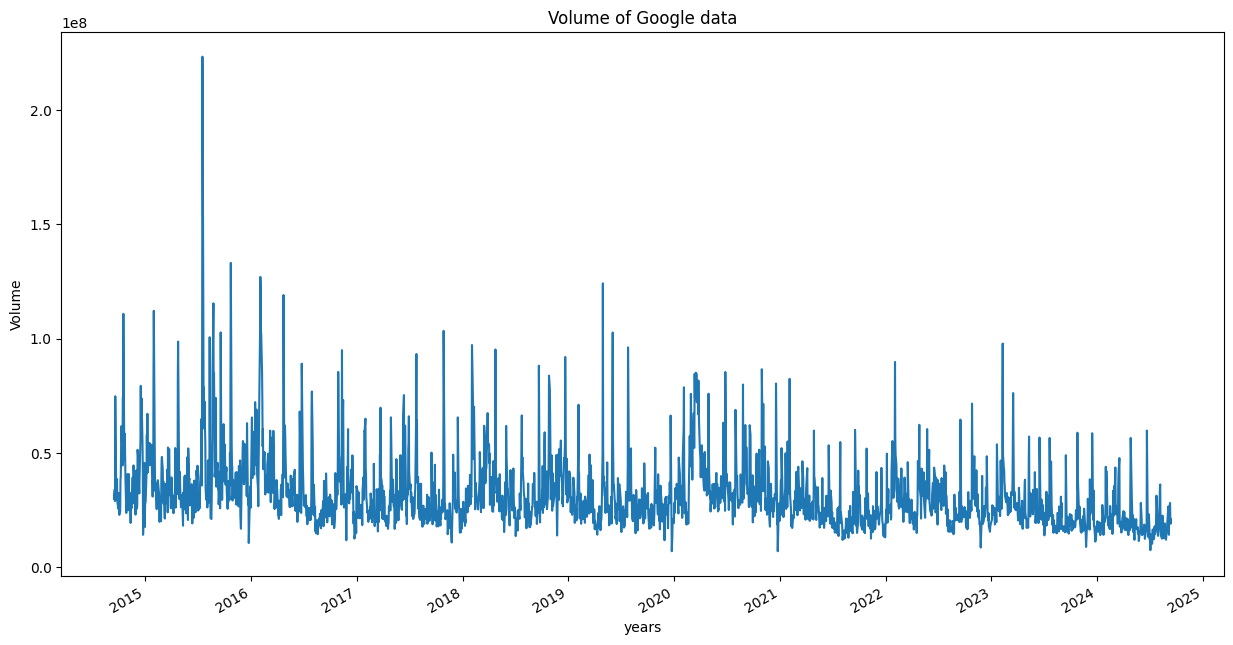

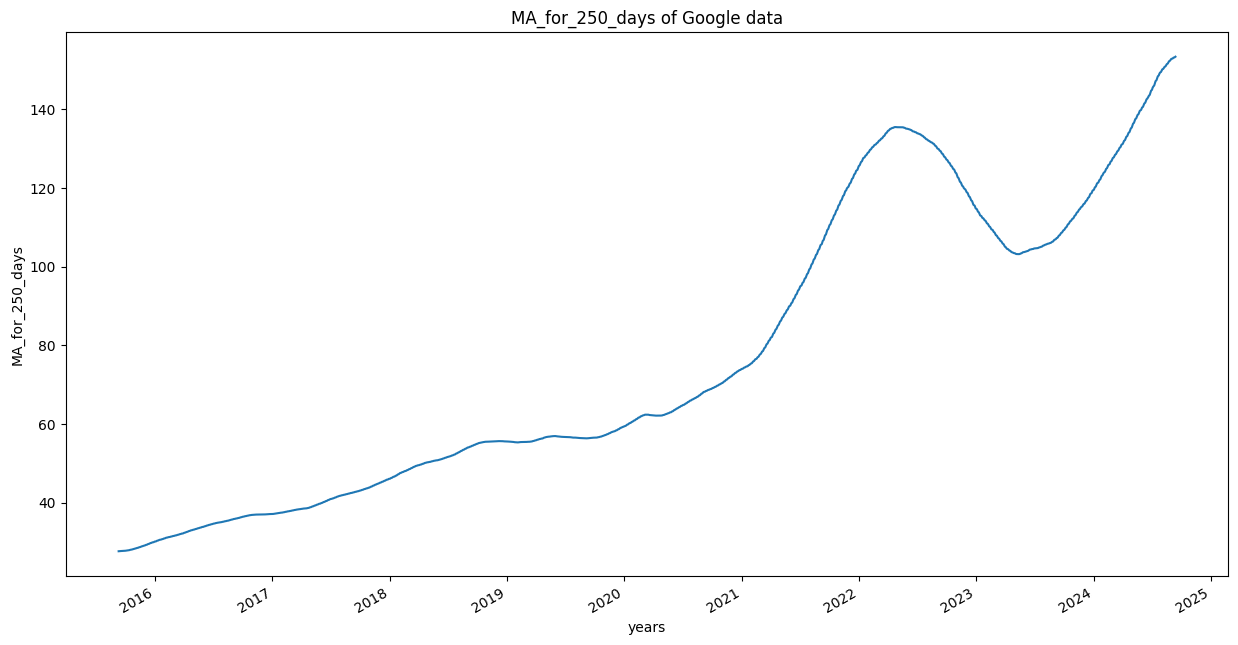

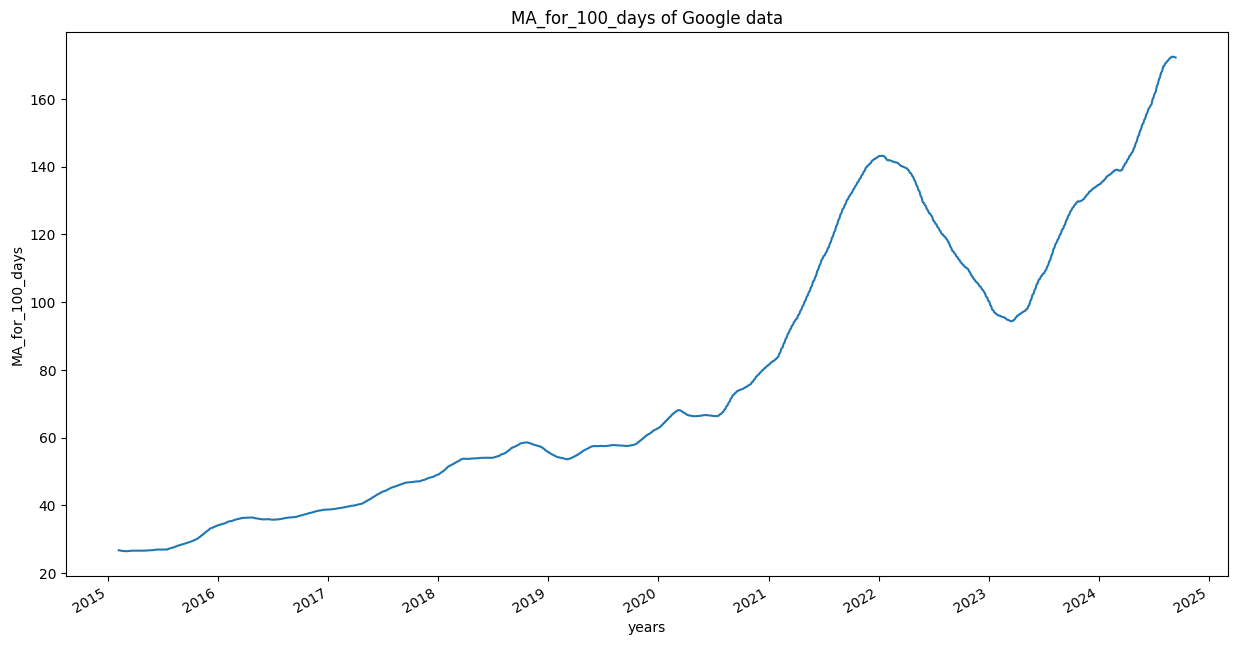

In [43]:
for column in google_data.columns:
    plot_graph((15,8),google_data[column],column)

In [21]:
temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [22]:
import pandas as pd
data=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [27]:
data.rolling(5).mean()

,0,MA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,30.0,NaN
5,40.0,NaN
6,50.0,NaN
7,60.0,NaN
8,70.0,50.0
9,80.0,60.0


In [30]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 76
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 176


In [31]:
google_data['MA_for_250_days']=google_data['Adj Close'].rolling(250).mean()

In [32]:
google_data['MA_for_250_days']

Date
2014-09-15           NaN
2014-09-16           NaN
2014-09-17           NaN
2014-09-18           NaN
2014-09-19           NaN
                 ...    
2024-09-06    153.127612
2024-09-09    153.176162
2024-09-10    153.233255
2024-09-11    153.293203
2024-09-12    153.360765
Name: MA_for_250_days, Length: 2516, dtype: float64

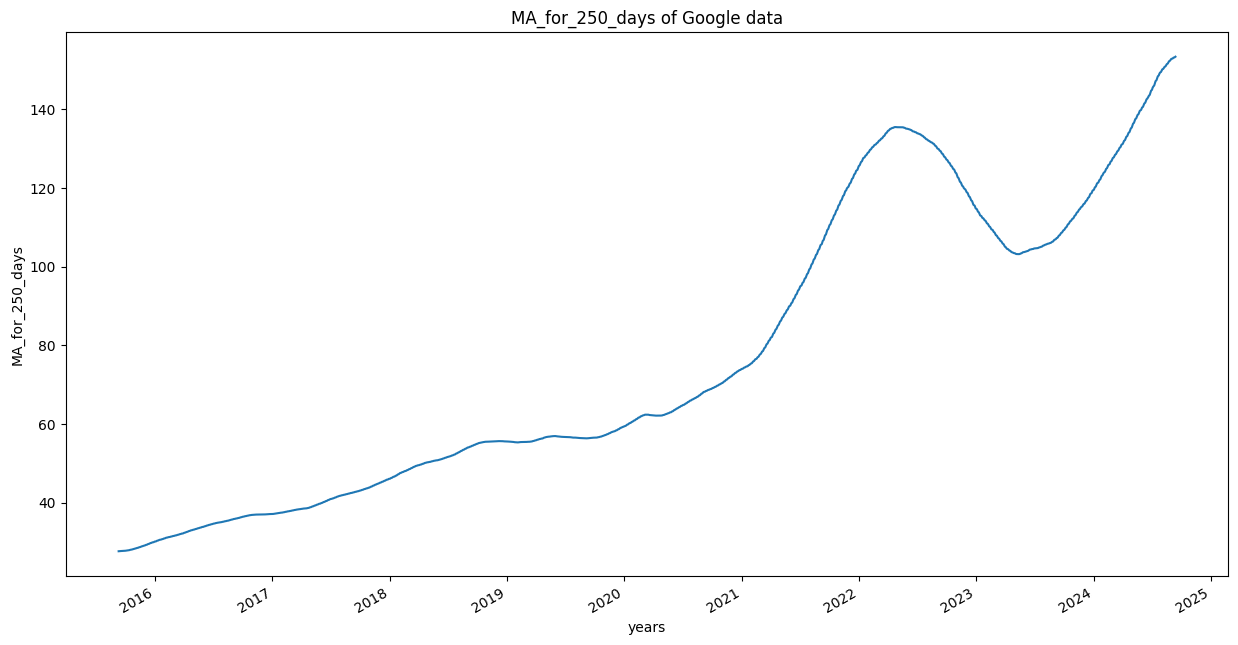

In [42]:
plot_graph((15,8),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

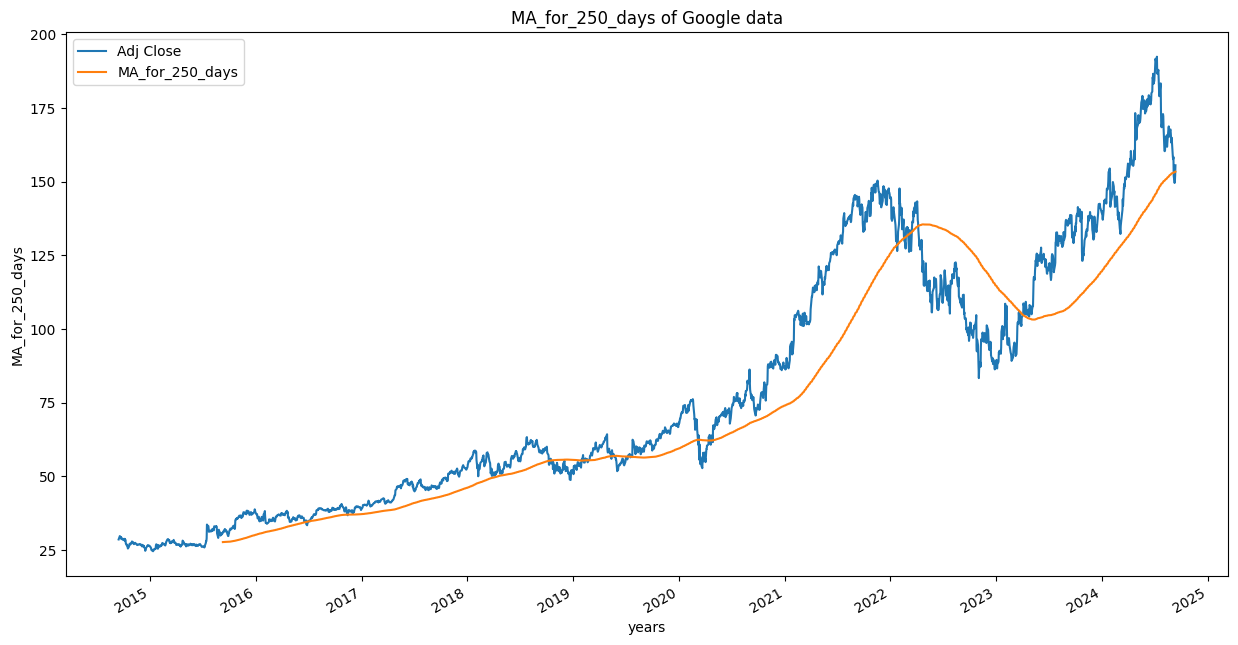

In [41]:
plot_graph((15,8),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

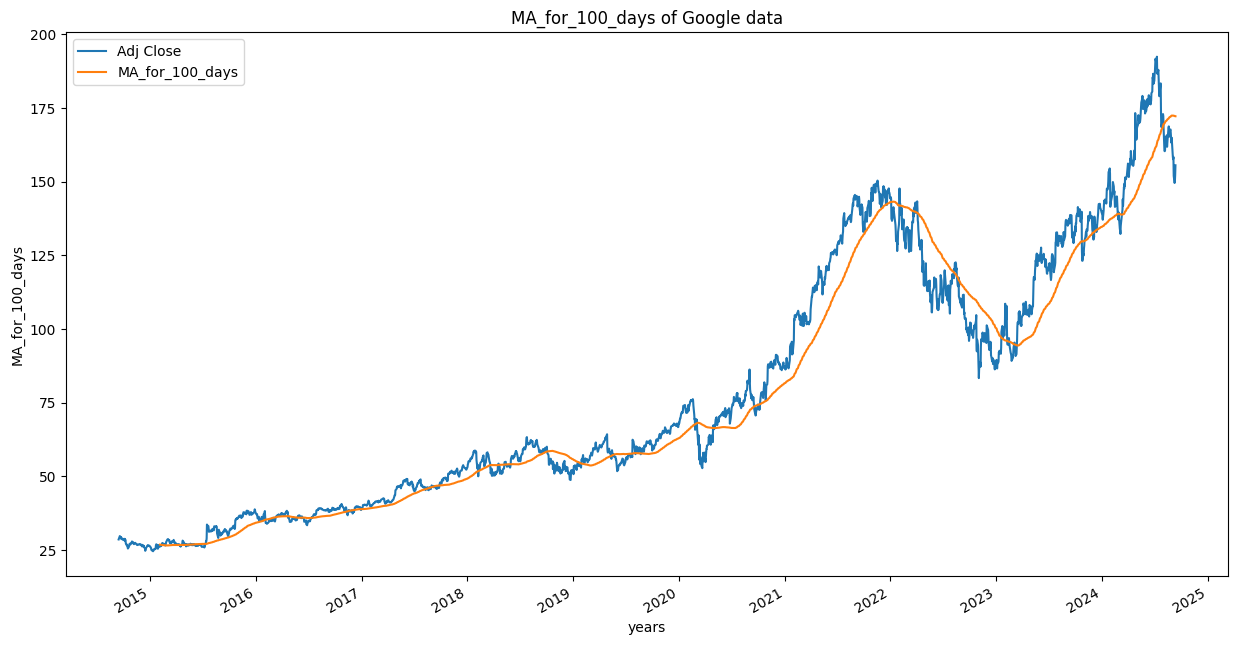

In [40]:
google_data['MA_for_100_days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,8),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

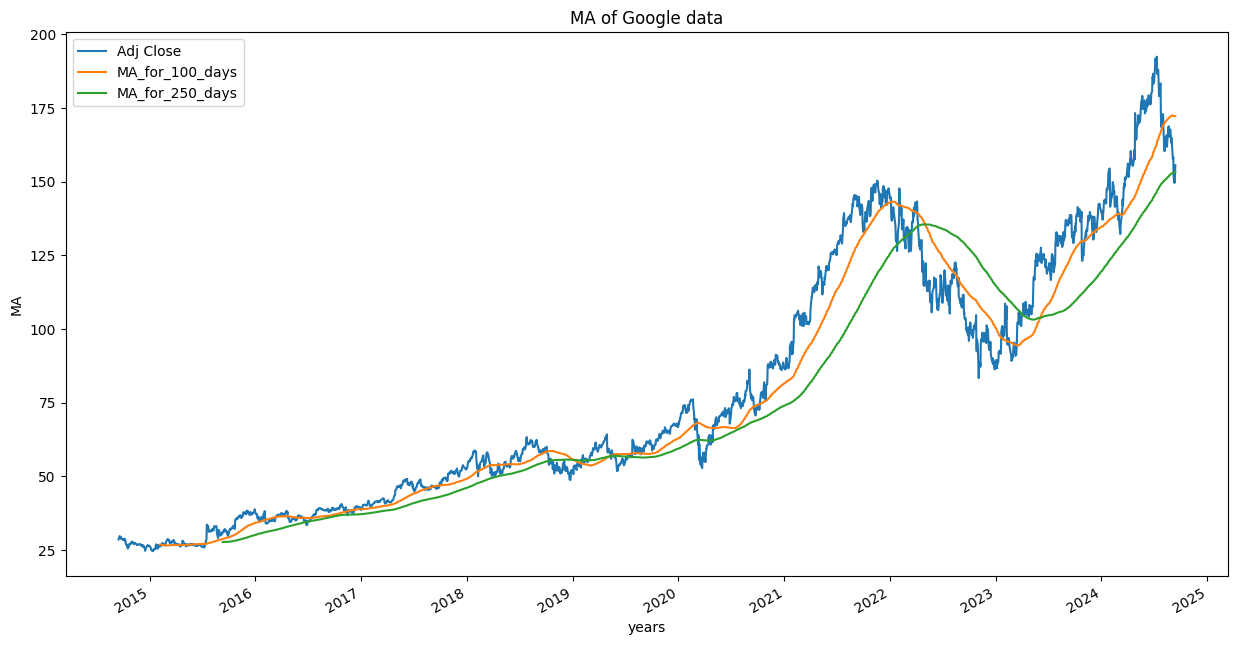

In [39]:
plot_graph((15,8),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [46]:
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-09-15,28.506538,NaN
2014-09-16,28.847260,0.011952
2014-09-17,29.087013,0.008311
2014-09-18,29.310848,0.007695
2014-09-19,29.649584,0.011557


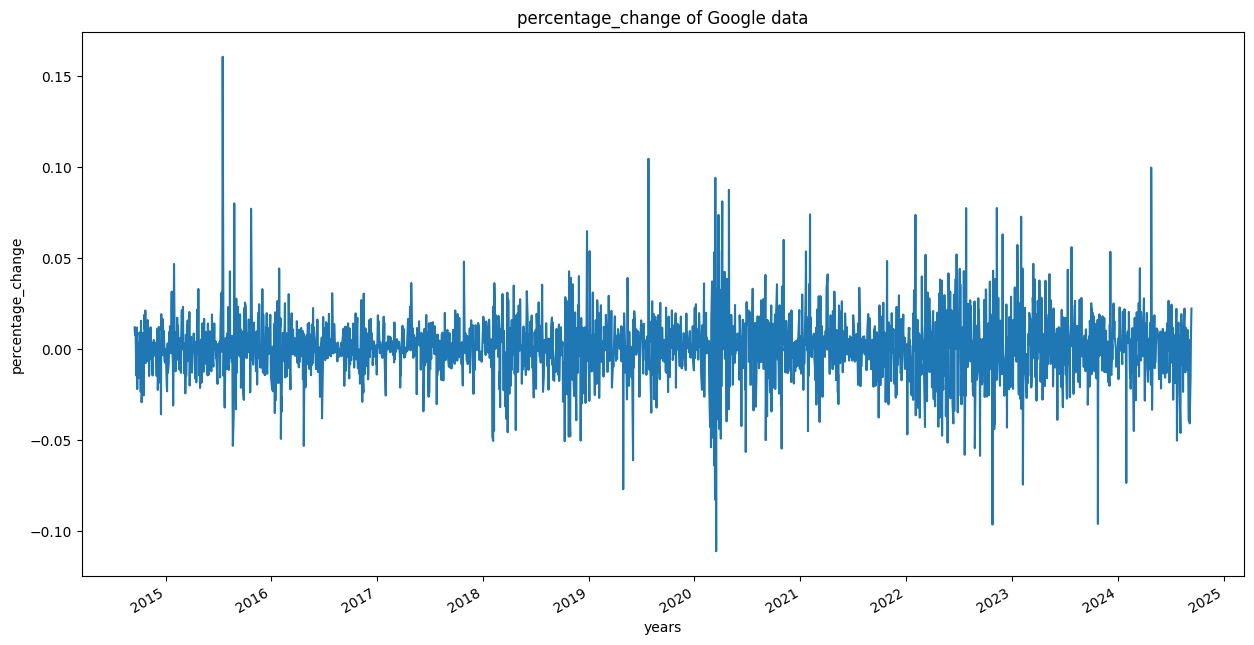

In [47]:
plot_graph((15,8),google_data['percentage_change_cp'],'percentage_change')

In [48]:
Adj_close_price=google_data[['Adj Close']]

In [49]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([24.49990273]))

In [50]:
#Convert into a range of 0-1

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02386226],
       [0.02589148],
       [0.02731938],
       ...,
       [0.74749847],
       [0.76024363],
       [0.7804334 ]])

In [53]:
len(scaled_data)

2516

In [55]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)
    

In [56]:
x_data[0],y_data[0]

(array([[0.02386226],
        [0.02589148],
        [0.02731938],
        [0.02865247],
        [0.03066987],
        [0.02808961],
        [0.02624106],
        [0.02827328],
        [0.02444287],
        [0.02504721],
        [0.024828  ],
        [0.02512423],
        [0.02243141],
        [0.02296759],
        [0.02450806],
        [0.02512127],
        [0.02108941],
        [0.02368449],
        [0.02024218],
        [0.01538678],
        [0.01204517],
        [0.0134464 ],
        [0.01110314],
        [0.00946788],
        [0.00551601],
        [0.00838067],
        [0.01006924],
        [0.01189706],
        [0.0152357 ],
        [0.01399149],
        [0.01428477],
        [0.0166932 ],
        [0.01682059],
        [0.0171109 ],
        [0.01970894],
        [0.01856545],
        [0.01823661],
        [0.0158104 ],
        [0.01466099],
        [0.01435586],
        [0.01627551],
        [0.01710497],
        [0.01622218],
        [0.01565043],
        [0.01536011],
        [0

In [57]:
int(len(x_data)*0.7)

1691

In [59]:
2415-100-int(len(x_data)*0.7)

624

In [60]:
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(725, 100, 1)
(725, 1)


In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [66]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [67]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [68]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - loss: 0.0036
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 4.0847e-04


In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [71]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [72]:
predictions

array([[0.6923762 ],
       [0.68730193],
       [0.6837812 ],
       [0.6895042 ],
       [0.69708174],
       [0.70656455],
       [0.7094955 ],
       [0.71199167],
       [0.7146914 ],
       [0.71910125],
       [0.72385675],
       [0.7279225 ],
       [0.73078537],
       [0.7295096 ],
       [0.7271578 ],
       [0.7282269 ],
       [0.7299625 ],
       [0.7313341 ],
       [0.7323222 ],
       [0.73491955],
       [0.7366434 ],
       [0.7343617 ],
       [0.7307534 ],
       [0.72727066],
       [0.7199186 ],
       [0.7166626 ],
       [0.7111269 ],
       [0.7051035 ],
       [0.70266485],
       [0.7005296 ],
       [0.7005704 ],
       [0.7063968 ],
       [0.71392703],
       [0.71990496],
       [0.7247662 ],
       [0.72579086],
       [0.7231207 ],
       [0.72238624],
       [0.71937686],
       [0.71385425],
       [0.70807153],
       [0.7054908 ],
       [0.70782614],
       [0.71177477],
       [0.7167231 ],
       [0.71912843],
       [0.720208  ],
       [0.719

In [73]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[140.75458 ],
       [139.90259 ],
       [139.31143 ],
       [140.27235 ],
       [141.54468 ],
       [143.1369  ],
       [143.62903 ],
       [144.04816 ],
       [144.50146 ],
       [145.2419  ],
       [146.04039 ],
       [146.72305 ],
       [147.20375 ],
       [146.98953 ],
       [146.59465 ],
       [146.77415 ],
       [147.06558 ],
       [147.29588 ],
       [147.46179 ],
       [147.8979  ],
       [148.18735 ],
       [147.80424 ],
       [147.19838 ],
       [146.6136  ],
       [145.37915 ],
       [144.83243 ],
       [143.90295 ],
       [142.89159 ],
       [142.48212 ],
       [142.1236  ],
       [142.13045 ],
       [143.10875 ],
       [144.37312 ],
       [145.37685 ],
       [146.19308 ],
       [146.36513 ],
       [145.9168  ],
       [145.79347 ],
       [145.28818 ],
       [144.3609  ],
       [143.38994 ],
       [142.95662 ],
       [143.34874 ],
       [144.01173 ],
       [144.84259 ],
       [145.24646 ],
       [145.42773 ],
       [145.3

In [74]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[138.43302917],
       [139.32981873],
       [146.06878662],
       [145.77101135],
       [147.90727234],
       [143.42178345],
       [145.50567627],
       [146.4303894 ],
       [148.3187561 ],
       [148.87538147],
       [148.98561096],
       [148.88287354],
       [146.26679993],
       [146.38850403],
       [149.27888489],
       [149.02201843],
       [148.71080017],
       [148.69682312],
       [150.33978271],
       [149.58514404],
       [146.71818542],
       [146.3974762 ],
       [146.35806274],
       [142.45614624],
       [145.75604248],
       [142.10301208],
       [141.27105713],
       [143.42428589],
       [142.17134094],
       [143.44421387],
       [147.67384338],
       [148.35617065],
       [147.74317932],
       [148.31077576],
       [146.34509277],
       [144.61535645],
       [147.00747681],
       [144.4836731 ],
       [142.45315552],
       [142.05264282],
       [143.86720276],
       [146.58900452],
       [146.7820282 ],
       [147

In [75]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [76]:
rmse

3.713174988277942

In [77]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-10-25,138.433029,140.754578
2021-10-26,139.329819,139.902588
2021-10-27,146.068787,139.311432
2021-10-28,145.771011,140.272354
2021-10-29,147.907272,141.544678


<Figure size 640x480 with 0 Axes>

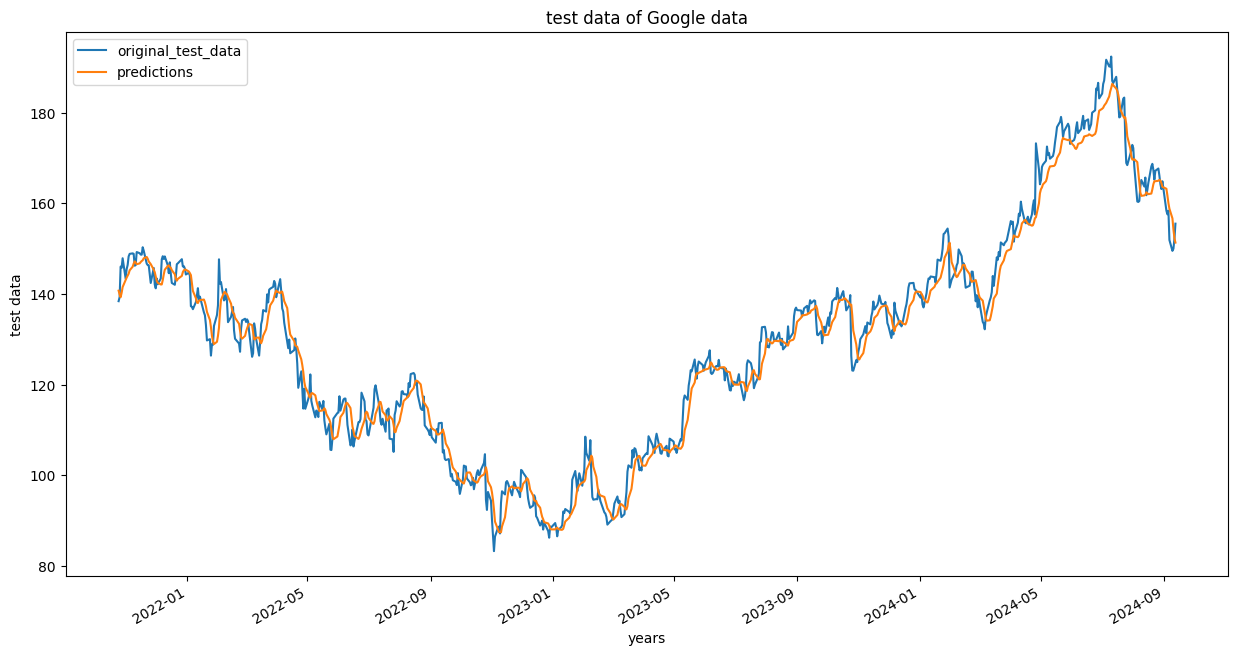

In [83]:
plot_graph((15,8), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

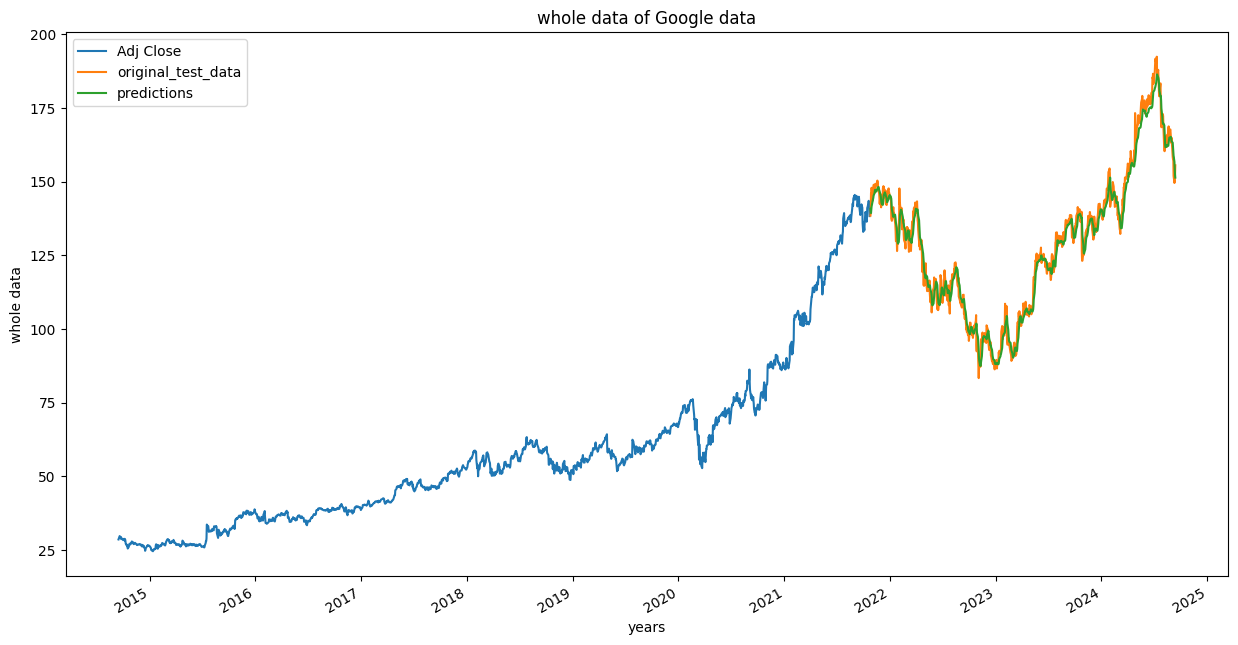

In [82]:
plot_graph((15,8), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [84]:
model.save("Latest_stock_price_model.keras")